In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123,1
1,1,5.9,106,0
2,2,5.3,121,0
3,3,7.4,132,1
4,4,5.8,142,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    int64  
 3   placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


In [4]:
# Preprocessing
df=df.iloc[:,1:]
df

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0
...,...,...,...
95,4.3,200,0
96,4.4,42,0
97,6.7,182,1
98,6.3,103,1


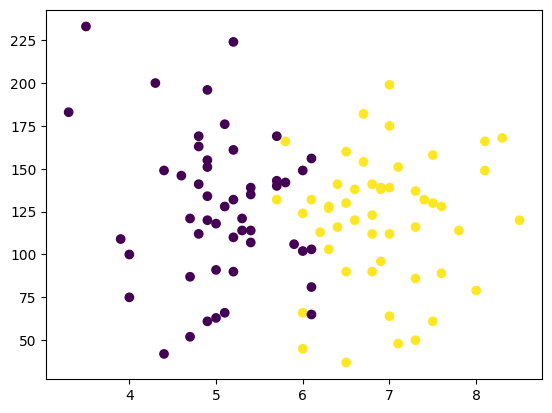

In [5]:
# EDA
x=df['cgpa']
y=df['iq']
plt.scatter(x,y,c=df['placement'])
plt.show()

In [6]:
# Extract input and output cols
x=df.iloc[:,:2]
y=df.iloc[:,-1]

In [7]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [8]:
x_train

,cgpa,iq
34,4.8,163
84,5.7,169
16,5.2,224
12,5.4,139
7,5.0,63
...,...,...
81,5.4,107
36,5.7,140
23,4.7,87
6,5.7,143


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [10]:
x_train=scaler.fit_transform(x_train)
x_train

array([[-1.0157859 ,  0.99196441],
       [-0.2231206 ,  1.14817927],
       [-0.66349021,  2.58014889],
       [-0.48734237,  0.36710494],
       [-0.83963806, -1.61161671],
       [ 0.83376646,  0.34106913],
       [ 1.00991431,  0.67953467],
       [-0.92771198, -0.12757547],
       [ 0.48147078,  0.13278264],
       [ 0.04110116, -1.53350928],
       [-0.13504668,  0.44521237],
       [-0.75156414,  1.33042995],
       [ 0.92184039,  1.92925361],
       [ 1.80257961, -1.19504373],
       [ 0.92184039, -0.33586196],
       [ 0.48147078,  0.91385697],
       [ 0.92184039, -1.5855809 ],
       [-0.66349021,  0.93989278],
       [ 0.04110116, -0.02343223],
       [ 0.39339685, -0.23171872],
       [ 1.89065353,  1.07007184],
       [-0.92771198, -1.66368834],
       [ 0.74569254, -0.04946804],
       [-1.72037728, -0.6482917 ],
       [-0.48734237,  0.26296169],
       [-1.36808159,  0.62746305],
       [-1.72037728, -1.29918698],
       [ 2.24294922, -0.12757547],
       [-1.10385983,

In [11]:
x_test=scaler.transform(x_test)
x_test

array([[ 0.92184039,  1.30439414],
       [-0.75156414, -1.53350928],
       [-0.04697276, -0.49207683],
       [ 0.48147078, -2.2885478 ],
       [ 1.18606215, -0.23171872],
       [-1.45615552,  1.95528942],
       [ 1.45028392, -0.93468562],
       [ 0.92184039,  0.36710494],
       [-0.75156414,  0.08071101],
       [ 1.36221   , -1.66368834]])

In [12]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [13]:
# Model Training
clf.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
y_pred=clf.predict(x_test)

In [15]:
y_test

52    1
9     0
1     0
82    1
72    1
95    0
42    1
32    1
86    0
44    1
Name: placement, dtype: int64

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

<Axes: >

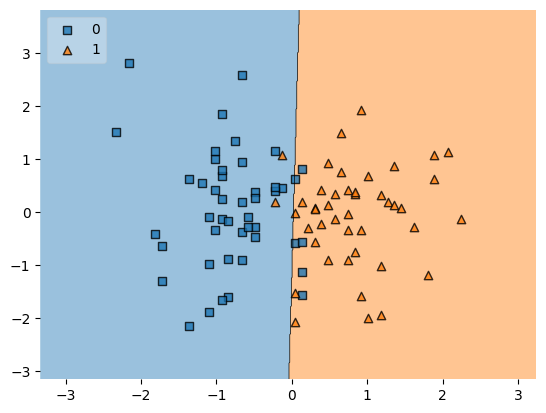

In [17]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [18]:
import pickle

In [19]:
pickle.dump(clf,open('model.pkl','wb'))